In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df_nba=pd.read_csv('nba_2013.csv')

In [5]:
df_nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


### Basics Dataframe Statistics

In [7]:
df_nba.describe().T

,count,mean,std,min,25%,50%,75%,max
age,481.0,26.509356,4.198265,19.0,23.000000,26.000000,29.000000,39.0
g,481.0,53.253638,25.322711,1.0,32.000000,61.000000,76.000000,83.0
gs,481.0,25.571726,29.658465,0.0,0.000000,10.000000,54.000000,82.0
mp,481.0,1237.386694,897.258840,1.0,388.000000,1141.000000,2016.000000,3122.0
fg,481.0,192.881497,171.832793,0.0,47.000000,146.000000,307.000000,849.0
fga,481.0,424.463617,368.850833,0.0,110.000000,332.000000,672.000000,1688.0
fg.,479.0,0.436436,0.098672,0.0,0.400500,0.438000,0.479500,1.0
x3p,481.0,39.613306,50.855639,0.0,0.000000,16.000000,68.000000,261.0
x3pa,481.0,110.130977,132.751732,0.0,3.000000,48.000000,193.000000,615.0
x3p.,414.0,0.285111,0.157633,0.0,0.234355,0.330976,0.375000,1.0


In [8]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [11]:
row,col=df_nba.shape
print('No of Data points: ',row)
print('No of Features: ',col)

No of Data points:  481
No of Features:  31


**Getting idea of No of NULL values in each feature**

In [12]:
df_nba.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

**Percentage of NULL values.**

In [13]:
df_nba.isna().sum()/row * 100

player           0.000000
pos              0.000000
age              0.000000
bref_team_id     0.000000
g                0.000000
gs               0.000000
mp               0.000000
fg               0.000000
fga              0.000000
fg.              0.415800
x3p              0.000000
x3pa             0.000000
x3p.            13.929314
x2p              0.000000
x2pa             0.000000
x2p.             0.623701
efg.             0.415800
ft               0.000000
fta              0.000000
ft.              4.158004
orb              0.000000
drb              0.000000
trb              0.000000
ast              0.000000
stl              0.000000
blk              0.000000
tov              0.000000
pf               0.000000
pts              0.000000
season           0.000000
season_end       0.000000
dtype: float64

### EDA

#### Feature: pos

In [17]:
df_nba['pos'].value_counts()

SG    109
SF     99
PF     96
C      90
PG     85
G       1
F       1
Name: pos, dtype: int64

<AxesSubplot:xlabel='pos', ylabel='count'>

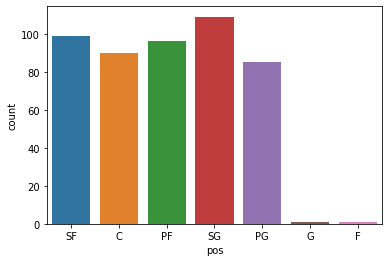

In [21]:
sns.countplot(x='pos',data=df_nba)

In [18]:
df_nba['pos'].isna().sum()

0

***No NULL values are present and we cannot rank these values hence using Onehot encoder on top of these data***

In [23]:
df_tmp=pd.get_dummies(df_nba['pos'],drop_first=True)
df_nba=df_nba.drop('pos',axis=1)
df_nba=pd.concat([df_nba,df_tmp],axis=1)
df_nba.head()

,player,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,pf,pts,season,season_end,F,G,PF,PG,SF,SG
0,Quincy Acy,23,TOT,63,0,847,66,141,0.468,4,...,122,171,2013-2014,2013,0,0,0,0,1,0
1,Steven Adams,20,OKC,81,20,1197,93,185,0.503,0,...,203,265,2013-2014,2013,0,0,0,0,0,0
2,Jeff Adrien,27,TOT,53,12,961,143,275,0.520,0,...,108,362,2013-2014,2013,0,0,1,0,0,0
3,Arron Afflalo,28,ORL,73,73,2552,464,1011,0.459,128,...,136,1330,2013-2014,2013,0,0,0,0,0,1
4,Alexis Ajinca,25,NOP,56,30,951,136,249,0.546,0,...,187,328,2013-2014,2013,0,0,0,0,0,0


In [25]:
df_nba.columns

Index(['player', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.',
       'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta',
       'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts',
       'season', 'season_end', 'F', 'G', 'PF', 'PG', 'SF', 'SG'],
      dtype='object')

In [26]:
#Dropping some columns which do not contribute towards deciding the dependent variable pts
df_nba=df_nba.drop(columns=['player','season','season_end','bref_team_id'])

In [28]:
print(df_nba.columns)
len(df_nba.columns)

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'F', 'G', 'PF', 'PG', 'SF',
       'SG'],
      dtype='object')


32

In [30]:
df_nba.corr()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,blk,tov,pf,pts,F,G,PF,PG,SF,SG
age,1.000000,-0.012074,0.025163,0.007961,-0.009749,-0.018304,0.025221,0.050611,0.028850,0.014235,...,-0.017398,-0.030789,-0.028221,-0.011910,0.048873,-0.005543,0.069581,0.008714,-0.021367,-0.047980
g,-0.012074,1.000000,0.610951,0.864487,0.739993,0.746963,0.322201,0.518074,0.537011,0.103762,...,0.475581,0.713508,0.865797,0.728462,-0.094284,-0.087067,0.073336,0.021857,0.022745,-0.051562
gs,0.025163,0.610951,1.000000,0.860036,0.821619,0.811531,0.234677,0.501808,0.515718,0.063468,...,0.505589,0.767107,0.725573,0.810294,-0.039395,-0.037855,0.028462,0.063176,-0.002361,-0.078331
mp,0.007961,0.864487,0.860036,1.000000,0.931120,0.936883,0.273682,0.645056,0.666126,0.138230,...,0.506254,0.885406,0.884484,0.927464,-0.062044,-0.060465,0.036107,0.093028,0.028666,-0.049145
fg,-0.009749,0.739993,0.821619,0.931120,1.000000,0.988262,0.278007,0.597239,0.613988,0.110514,...,0.484208,0.903383,0.798769,0.992041,-0.050756,-0.050756,0.086495,0.071924,-0.036136,-0.043080
fga,-0.018304,0.746963,0.811531,0.936883,0.988262,1.000000,0.211174,0.662004,0.685535,0.152111,...,0.412738,0.910689,0.786560,0.989211,-0.051837,-0.051465,0.048004,0.117994,-0.016313,-0.014752
fg.,0.025221,0.322201,0.234677,0.273682,0.278007,0.211174,1.000000,-0.025510,-0.041720,-0.039424,...,0.401431,0.221846,0.359125,0.248276,-0.047997,-0.099505,0.149736,-0.163892,-0.105781,-0.156684
x3p,0.050611,0.518074,0.501808,0.645056,0.597239,0.662004,-0.025510,1.000000,0.991700,0.462709,...,-0.043707,0.560520,0.446711,0.655342,-0.035590,-0.035590,-0.151726,0.170361,0.125237,0.188286
x3pa,0.028850,0.537011,0.515718,0.666126,0.613988,0.685535,-0.041720,0.991700,1.000000,0.449886,...,-0.040987,0.589799,0.463455,0.672076,-0.037905,-0.037217,-0.153465,0.187046,0.134670,0.182473
x3p.,0.014235,0.103762,0.063468,0.138230,0.110514,0.152111,-0.039424,0.462709,0.449886,1.000000,...,-0.187411,0.097876,-0.019089,0.144431,NaN,-0.089108,-0.135649,0.163930,0.094480,0.154223


<AxesSubplot:>

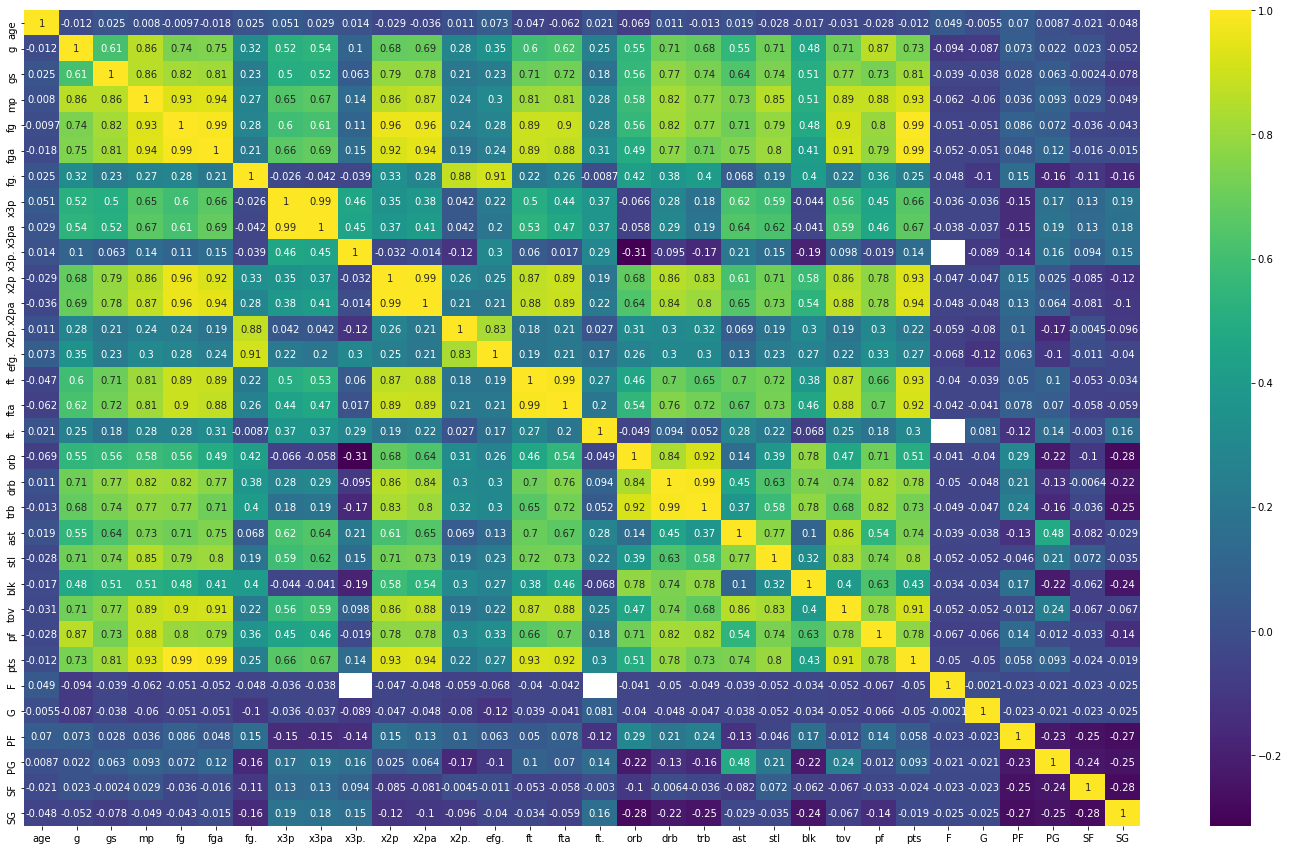

In [40]:
plt.figure(figsize=(25,15))
sns.heatmap(df_nba.corr(),annot=True,cmap='viridis')

***From above correlation heatmap it seems like some of the features are quite correlated with each other. These are basically the ones with almost same feature names.***

In [51]:
x3p=df_nba[['x3p','x3pa','x3p.']]
x3p['tmp']=x3p['x3p']/x3p['x3pa']
x3p.head()

,x3p,x3pa,x3p.,tmp
0,4,15,0.266667,0.266667
1,0,0,NaN,NaN
2,0,0,NaN,NaN
3,128,300,0.426667,0.426667
4,0,1,0.000000,0.000000


***x3p. show the percentage of columns x3p and x3pa. Hence dropping these columns. Also replacing NaN values in x3p. feature with 0 as this seems to be due to divide by zero issue.***

In [53]:
df_nba=df_nba.drop(columns=['x3p','x3pa'])

In [55]:
df_nba['x3p.']=df_nba['x3p.'].fillna(0)

In [56]:
df_nba.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p.', 'x2p', 'x2pa',
       'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'F', 'G', 'PF', 'PG', 'SF', 'SG'],
      dtype='object')

***Similar patterns are observed with features 'fg', 'fga', 'fg.','x2p', 'x2pa', 'x2p.','ft', 'fta', 'ft.' hence handling these same way as above displayed.***

In [59]:
df_nba=df_nba.drop(columns=['fg','fga','x2p','x2pa','ft','fta'])

In [64]:
df_nba[['fg.','x2p.','ft.','efg.']]=df_nba[['fg.','x2p.','ft.','efg.']].fillna(0)

In [65]:
df_nba.isna().sum()

age     0
g       0
gs      0
mp      0
fg.     0
x3p.    0
x2p.    0
efg.    0
ft.     0
orb     0
drb     0
trb     0
ast     0
stl     0
blk     0
tov     0
pf      0
pts     0
F       0
G       0
PF      0
PG      0
SF      0
SG      0
dtype: int64

***NULL values are handled now. Few of the correlated columns are dropped. Now checking correlation heatmap.***

<AxesSubplot:>

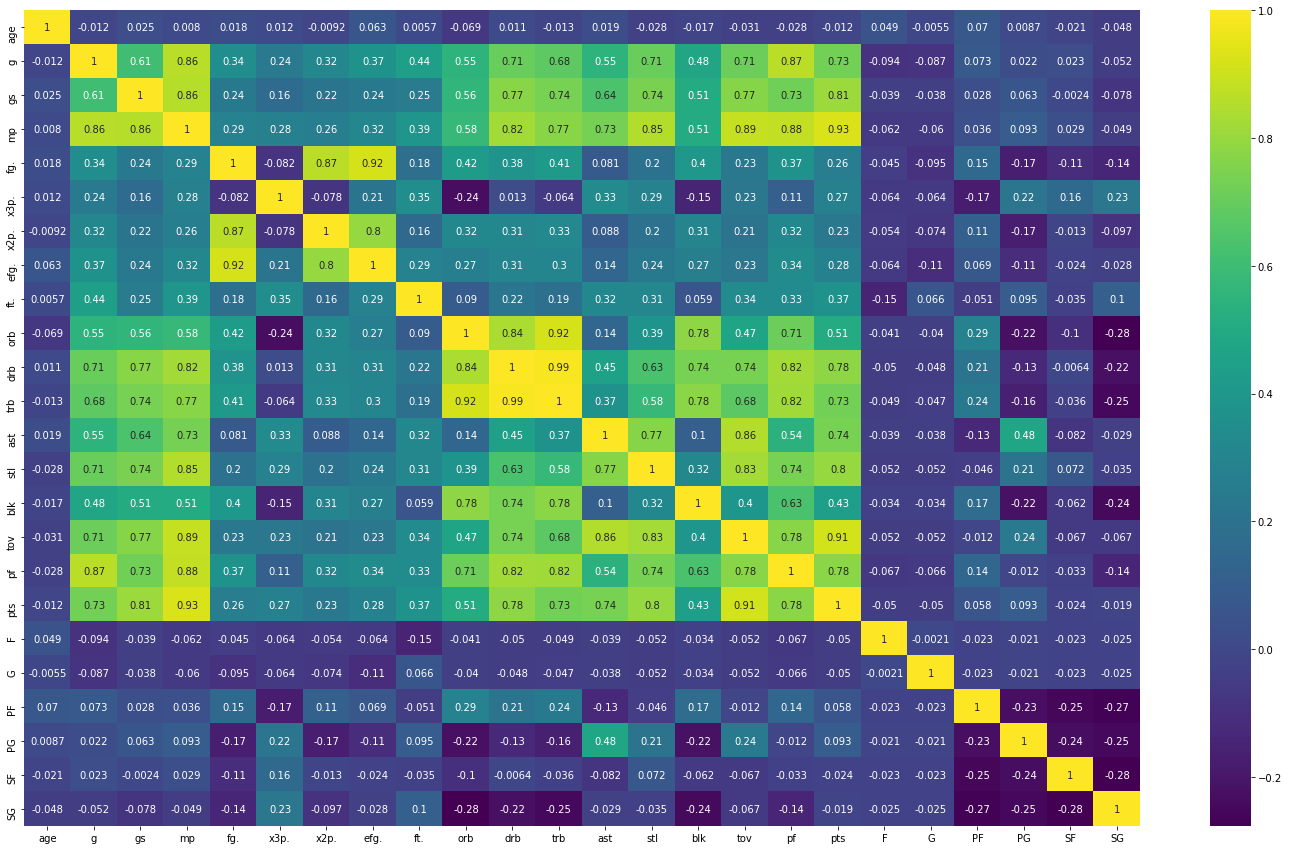

In [66]:
plt.figure(figsize=(25,15))
sns.heatmap(df_nba.corr(),annot=True,cmap='viridis')

### Feature: g & gs

Text(0, 0.5, 'Player Points')

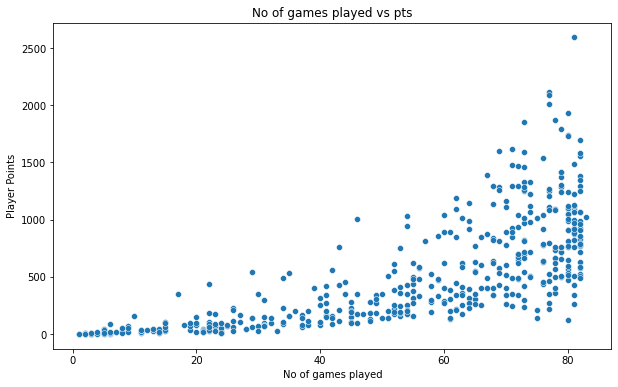

In [69]:
plt.figure(figsize=(10,6))
sns.scatterplot('g','pts',data=df_nba)
plt.title('No of games played vs pts')
plt.xlabel('No of games played')
plt.ylabel('Player Points')

Text(0, 0.5, 'Player Points')

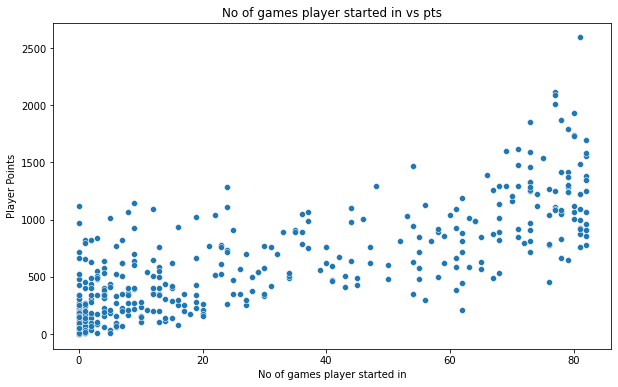

In [70]:
plt.figure(figsize=(10,6))
sns.scatterplot('gs','pts',data=df_nba)
plt.title('No of games player started in vs pts')
plt.xlabel('No of games player started in')
plt.ylabel('Player Points')

In [71]:
X=df_nba.drop('pts',axis=1)
y=df_nba['pts']

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=365)

In [128]:
model=KNeighborsRegressor()

In [129]:
model.fit(X_train,y_train)

KNeighborsRegressor()

In [130]:
y_pred = model.predict(X_test)

In [131]:
#Prediction score on train dataset
model.score(X_train,y_train)

0.9178269704362931

In [132]:
#Prediction score on test dataset
model.score(X_test,y_test)

0.8308027213906196

In [135]:
#leaf_s=[i in range(2,40)]
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [i for i in range(5,41,2)],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [136]:
gridsearch = GridSearchCV(model, param_grid,verbose=5)

In [137]:
gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=3 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=3, score=0.892, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=3 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=3, score=0.892, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=3 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=3, score=0.794, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=3 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=3, score=0.824, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=3 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=3, score=0.886, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=5 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=5, score=0.890, total=   0.0s
[CV] algorithm=bal

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=12, score=0.823, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=12 ................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=12, score=0.850, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=13 ................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=13, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=13 ................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=13, score=0.879, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=13 ................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=13, score=0.766, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=13 ................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=13, score=0.836, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=13 ................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=13, score=0.841, total= 

[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=10, score=0.837, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=10 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=10, score=0.861, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=11 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=11, score=0.870, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=11 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=11, score=0.883, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=11 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=11, score=0.751, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=11 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=11, score=0.830, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=11 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=11, score=0.856, total= 

[CV]  algorithm=ball_tree, leaf_size=13, n_neighbors=10, score=0.861, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=13, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=13, n_neighbors=11, score=0.870, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=13, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=13, n_neighbors=11, score=0.883, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=13, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=13, n_neighbors=11, score=0.751, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=13, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=13, n_neighbors=11, score=0.830, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=13, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=13, n_neighbors=11, score=0.856, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=13, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=13, n_neighbors=12, score=0.867, 

[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=9, score=0.834, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=9, score=0.858, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=10, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=10, score=0.883, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=10, score=0.753, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=10, score=0.837, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=10, score=0.861, to

[CV]  algorithm=ball_tree, leaf_size=21, n_neighbors=10, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=21, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=21, n_neighbors=10, score=0.883, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=21, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=21, n_neighbors=10, score=0.753, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=21, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=21, n_neighbors=10, score=0.837, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=21, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=21, n_neighbors=10, score=0.861, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=21, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=21, n_neighbors=11, score=0.870, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=21, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=21, n_neighbors=11, score=0.883, 

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=9, score=0.834, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=9, score=0.858, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=10, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=10, score=0.883, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=10, score=0.753, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=10, score=0.837, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=10, score=0.861, to

[CV]  algorithm=ball_tree, leaf_size=29, n_neighbors=10, score=0.753, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=29, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=29, n_neighbors=10, score=0.837, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=29, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=29, n_neighbors=10, score=0.861, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=29, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=29, n_neighbors=11, score=0.870, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=29, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=29, n_neighbors=11, score=0.883, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=29, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=29, n_neighbors=11, score=0.751, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=29, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=29, n_neighbors=11, score=0.830, 

[CV]  algorithm=ball_tree, leaf_size=33, n_neighbors=10, score=0.753, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=33, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=33, n_neighbors=10, score=0.837, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=33, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=33, n_neighbors=10, score=0.861, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=33, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=33, n_neighbors=11, score=0.870, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=33, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=33, n_neighbors=11, score=0.883, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=33, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=33, n_neighbors=11, score=0.751, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=33, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=33, n_neighbors=11, score=0.830, 

[CV]  algorithm=ball_tree, leaf_size=37, n_neighbors=10, score=0.753, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=37, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=37, n_neighbors=10, score=0.837, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=37, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=37, n_neighbors=10, score=0.861, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=37, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=37, n_neighbors=11, score=0.870, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=37, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=37, n_neighbors=11, score=0.883, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=37, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=37, n_neighbors=11, score=0.751, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=37, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=37, n_neighbors=11, score=0.830, 

[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=9, score=0.863, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=9 ...................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=9, score=0.888, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=9 ...................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=9, score=0.749, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=9 ...................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=9, score=0.834, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=9 ...................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=9, score=0.858, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=10 ..................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=10, score=0.864, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=10 ..................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=10, score=0.883, total=   0.0s
[CV] algorit

[CV]  algorithm=kd_tree, leaf_size=9, n_neighbors=3, score=0.824, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_neighbors=3 ...................
[CV]  algorithm=kd_tree, leaf_size=9, n_neighbors=3, score=0.886, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_neighbors=5 ...................
[CV]  algorithm=kd_tree, leaf_size=9, n_neighbors=5, score=0.890, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_neighbors=5 ...................
[CV]  algorithm=kd_tree, leaf_size=9, n_neighbors=5, score=0.881, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_neighbors=5 ...................
[CV]  algorithm=kd_tree, leaf_size=9, n_neighbors=5, score=0.798, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_neighbors=5 ...................
[CV]  algorithm=kd_tree, leaf_size=9, n_neighbors=5, score=0.840, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_neighbors=5 ...................
[CV]  algorithm=kd_tree, leaf_size=9, n_neighbors=5, score=0.883, total=   0.0s
[CV] algorithm

[CV]  algorithm=kd_tree, leaf_size=11, n_neighbors=12, score=0.867, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=11, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=11, n_neighbors=12, score=0.878, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=11, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=11, n_neighbors=12, score=0.766, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=11, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=11, n_neighbors=12, score=0.823, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=11, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=11, n_neighbors=12, score=0.850, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=11, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=11, n_neighbors=13, score=0.864, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=11, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=11, n_neighbors=13, score=0.879, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=5, score=0.883, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=7, score=0.870, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=7, score=0.888, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=7, score=0.766, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=7, score=0.826, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=7, score=0.864, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=9, score=0.863, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=12, score=0.823, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=12, score=0.850, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=13, score=0.864, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=13, score=0.879, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=13, score=0.766, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=13, score=0.836, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=13, score=0.841, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=21, n_neighbors=10, score=0.753, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=21, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=21, n_neighbors=10, score=0.837, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=21, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=21, n_neighbors=10, score=0.861, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=21, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=21, n_neighbors=11, score=0.870, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=21, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=21, n_neighbors=11, score=0.883, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=21, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=21, n_neighbors=11, score=0.751, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=21, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=21, n_neighbors=11, score=0.830, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.834, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.858, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.864, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.883, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.753, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.837, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.861, total=   0.0s
[C

[CV]  algorithm=kd_tree, leaf_size=29, n_neighbors=5, score=0.881, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=29, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=29, n_neighbors=5, score=0.798, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=29, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=29, n_neighbors=5, score=0.840, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=29, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=29, n_neighbors=5, score=0.883, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=29, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=29, n_neighbors=7, score=0.870, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=29, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=29, n_neighbors=7, score=0.888, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=29, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=29, n_neighbors=7, score=0.766, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=31, n_neighbors=13, score=0.841, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=33, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=33, n_neighbors=3, score=0.892, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=33, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=33, n_neighbors=3, score=0.892, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=33, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=33, n_neighbors=3, score=0.794, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=33, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=33, n_neighbors=3, score=0.824, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=33, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=33, n_neighbors=3, score=0.886, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=33, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=33, n_neighbors=5, score=0.890, total=   0.0s
[CV] a

[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=13, score=0.864, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=13, score=0.879, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=13, score=0.766, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=13, score=0.836, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=13, score=0.841, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=37, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=37, n_neighbors=3, score=0.892, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=37, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=37, n_neighbors=3, score=0.892, total=   0.0s
[C

[CV]  algorithm=kd_tree, leaf_size=39, n_neighbors=11, score=0.830, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=39, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=39, n_neighbors=11, score=0.856, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=39, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=39, n_neighbors=12, score=0.867, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=39, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=39, n_neighbors=12, score=0.878, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=39, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=39, n_neighbors=12, score=0.766, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=39, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=39, n_neighbors=12, score=0.823, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=39, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=39, n_neighbors=12, score=0.850, total=   0.0s


[CV]  algorithm=brute, leaf_size=7, n_neighbors=10, score=0.883, total=   0.0s
[CV] algorithm=brute, leaf_size=7, n_neighbors=10 ....................
[CV]  algorithm=brute, leaf_size=7, n_neighbors=10, score=0.753, total=   0.0s
[CV] algorithm=brute, leaf_size=7, n_neighbors=10 ....................
[CV]  algorithm=brute, leaf_size=7, n_neighbors=10, score=0.837, total=   0.0s
[CV] algorithm=brute, leaf_size=7, n_neighbors=10 ....................
[CV]  algorithm=brute, leaf_size=7, n_neighbors=10, score=0.861, total=   0.0s
[CV] algorithm=brute, leaf_size=7, n_neighbors=11 ....................
[CV]  algorithm=brute, leaf_size=7, n_neighbors=11, score=0.870, total=   0.0s
[CV] algorithm=brute, leaf_size=7, n_neighbors=11 ....................
[CV]  algorithm=brute, leaf_size=7, n_neighbors=11, score=0.883, total=   0.0s
[CV] algorithm=brute, leaf_size=7, n_neighbors=11 ....................
[CV]  algorithm=brute, leaf_size=7, n_neighbors=11, score=0.751, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=11, n_neighbors=11, score=0.883, total=   0.0s
[CV] algorithm=brute, leaf_size=11, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=11, n_neighbors=11, score=0.751, total=   0.0s
[CV] algorithm=brute, leaf_size=11, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=11, n_neighbors=11, score=0.830, total=   0.0s
[CV] algorithm=brute, leaf_size=11, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=11, n_neighbors=11, score=0.856, total=   0.0s
[CV] algorithm=brute, leaf_size=11, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=11, n_neighbors=12, score=0.867, total=   0.0s
[CV] algorithm=brute, leaf_size=11, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=11, n_neighbors=12, score=0.878, total=   0.0s
[CV] algorithm=brute, leaf_size=11, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=11, n_neighbors=12, score=0.766, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=17, n_neighbors=5, score=0.890, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=17, n_neighbors=5, score=0.881, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=17, n_neighbors=5, score=0.798, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=17, n_neighbors=5, score=0.840, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=17, n_neighbors=5, score=0.883, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=17, n_neighbors=7, score=0.870, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=17, n_neighbors=7, score=0.888, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=21, n_neighbors=10, score=0.837, total=   0.0s
[CV] algorithm=brute, leaf_size=21, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=21, n_neighbors=10, score=0.861, total=   0.0s
[CV] algorithm=brute, leaf_size=21, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=21, n_neighbors=11, score=0.870, total=   0.0s
[CV] algorithm=brute, leaf_size=21, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=21, n_neighbors=11, score=0.883, total=   0.0s
[CV] algorithm=brute, leaf_size=21, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=21, n_neighbors=11, score=0.751, total=   0.0s
[CV] algorithm=brute, leaf_size=21, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=21, n_neighbors=11, score=0.830, total=   0.0s
[CV] algorithm=brute, leaf_size=21, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=21, n_neighbors=11, score=0.856, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=27, n_neighbors=3, score=0.824, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=3, score=0.886, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.890, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.881, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.798, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.840, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.883, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=31, n_neighbors=10, score=0.883, total=   0.0s
[CV] algorithm=brute, leaf_size=31, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=31, n_neighbors=10, score=0.753, total=   0.0s
[CV] algorithm=brute, leaf_size=31, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=31, n_neighbors=10, score=0.837, total=   0.0s
[CV] algorithm=brute, leaf_size=31, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=31, n_neighbors=10, score=0.861, total=   0.0s
[CV] algorithm=brute, leaf_size=31, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=31, n_neighbors=11, score=0.870, total=   0.0s
[CV] algorithm=brute, leaf_size=31, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=31, n_neighbors=11, score=0.883, total=   0.0s
[CV] algorithm=brute, leaf_size=31, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=31, n_neighbors=11, score=0.751, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=37, n_neighbors=3, score=0.892, total=   0.0s
[CV] algorithm=brute, leaf_size=37, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=37, n_neighbors=3, score=0.892, total=   0.0s
[CV] algorithm=brute, leaf_size=37, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=37, n_neighbors=3, score=0.794, total=   0.0s
[CV] algorithm=brute, leaf_size=37, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=37, n_neighbors=3, score=0.824, total=   0.0s
[CV] algorithm=brute, leaf_size=37, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=37, n_neighbors=3, score=0.886, total=   0.0s
[CV] algorithm=brute, leaf_size=37, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=37, n_neighbors=5, score=0.890, total=   0.0s
[CV] algorithm=brute, leaf_size=37, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=37, n_neighbors=5, score=0.881, total=   0.0s
[CV] algorithm=brute,

[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:   10.5s finished


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25,
                                       27, 29, 31, 33, 35, 37, 39],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=5)

In [138]:
# let's see the  best parameters according to gridsearch
best_param=gridsearch.best_params_

In [139]:
best_param

{'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 5}

In [140]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsRegressor(algorithm = best_param['algorithm'], leaf_size=best_param['leaf_size'], n_neighbors =best_param['n_neighbors'])

In [141]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=5)

In [142]:
#Prediction score on train dataset
knn.score(X_train,y_train)

0.9178269704362931

In [143]:
knn.score(X_test,y_test)

0.8308027213906196

In [144]:
from sklearn.model_selection import KFold
#k-fold cross validation 
kfold = KFold(n_splits=12,random_state= 365)
kfold.get_n_splits(X_scaled)

12

In [145]:
from statistics import mean
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.9173650980311231 and test score is :   0.8099265044680258
for k =  2
train_score is :   0.9183800447466562 and test score is :   0.8300722980135616
for k =  3
train_score is :   0.913397057798017 and test score is :   0.883533318037717
for k =  4
train_score is :   0.91883039445607 and test score is :   0.8151802337881243
for k =  5
train_score is :   0.9119163084354981 and test score is :   0.9166172769767958
for k =  6
train_score is :   0.9102260373366035 and test score is :   0.9227306146924167
for k =  7
train_score is :   0.9156444048670855 and test score is :   0.9126264966254687
for k =  8
train_score is :   0.9158586819600634 and test score is :   0.8604182986114282
for k =  9
train_score is :   0.9219999707653729 and test score is :   0.8372308765912193
for k =  10
train_score is :   0.9215595688186271 and test score is :   0.7231324343355142
for k =  11
train_score is :   0.9148488032398331 and test score is :   0.8808744971325257
for k =  12


([<matplotlib.axis.YTick at 0x24efd7f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

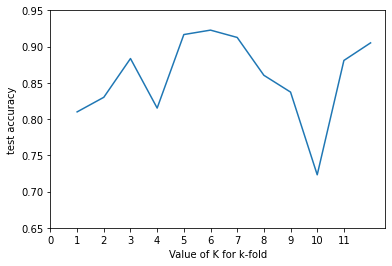

In [146]:
# let's plot the test_accuracy with the value of k in k-fold

plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 

In [148]:
# let's save the model
import pickle

with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(knn,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(sc,f)